<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget --no-check-certificate -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-22 20:17:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

     0K .......... .......... ..                              100% 5.10M=0.004s

2022-08-22 20:17:35 (5.10 MB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape


(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\corde\anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\corde\anaconda3\Library\bin\libcrypto-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\corde\anaconda3\Library\bin\libssl-1_1-x64.dll.c~.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\corde\anaconda3\Library\bin\libcrypto-1_1-x64.dll.  Please remove this file manually (you may need to reboot to free file handles)
ERROR conda.core.link:_execute(730): An error occurred while installing package 'anaconda::openssl-1.1.1o-h2bbff1b_0'.
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\corde\anaconda3\Library\bin\libssl-1_1-x64.dll.  Please remove this file 


  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> anaconda::ca-certificates-2022.4.26-haa95532_0
  certifi            conda-forge::certifi-2022.6.15-py39hc~ --> anaconda::certifi-2022.6.15-py39haa95532_0
  conda              conda-forge::conda-4.14.0-py39hcbf530~ --> pkgs/main::conda-4.14.0-py39haa95532_0
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> anaconda::openssl-1.1.1o-h2bbff1b_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Rolling back transaction: ...working... done


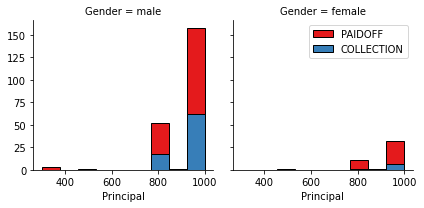

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

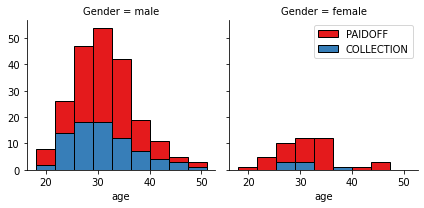

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


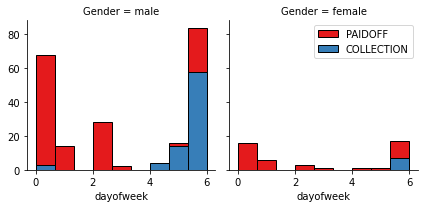

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
# Electing to convert loan_status and education also.

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)
df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3],inplace=True)
df.head()



,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,1,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,1,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,1,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
# Already converted above

#### Features before One Hot Encoding


In [15]:
# converted above

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
# education converted above with ...
# df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3],inplace=True)


### Feature Selection


Let's define feature set X: (after conversions), 
Feature = df[['Principal','terms','age','Gender','education','weekend']]

In [17]:
Feature = df[['Principal','terms','age','Gender','education','weekend']]
X = Feature
X[0:5]

,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,0,0
1,1000,30,33,1,2,0
2,1000,15,27,0,1,0
3,1000,30,28,1,1,1
4,1000,30,29,0,1,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.99512471,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  1.83872837,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004,  0.42180183,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.42180183,
         0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.42180183,
         0.82934003]])

In [20]:
# Split data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [21]:
# Data already split above.
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [24]:
X[0:5]


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.99512471,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  1.83872837,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004,  0.42180183,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.42180183,
         0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.42180183,
         0.82934003]])

In [25]:
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [26]:
yhat = neigh.predict(X_test)
yhatKNN = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

In [27]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.6857142857142857


In [28]:
# Check range of Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68571429, 0.67142857, 0.71428571, 0.68571429, 0.75714286,
       0.68571429, 0.8       , 0.77142857, 0.77142857])

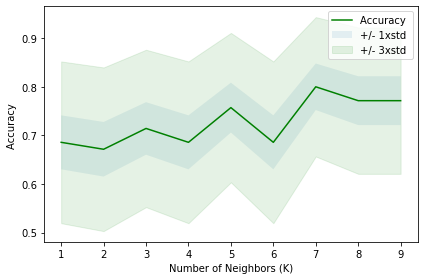

In [29]:
# PLot results of trials

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 7


# Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [32]:
# Reminder
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,1,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,1,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,1,0,4,1


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Data already split above

In [35]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [36]:
LoanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
predTree = LoanTree.predict(X_test)
predTree

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1], dtype=int64)

In [38]:
# print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]


In [39]:
yhatDT = predTree

In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6142857142857143


In [41]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


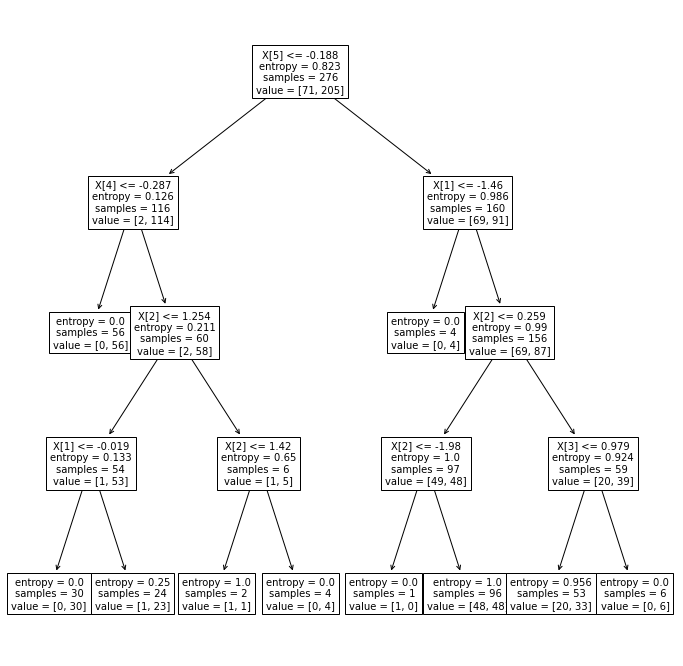

In [42]:
plt.figure(figsize=(12,12)) 
tree.plot_tree(LoanTree, fontsize=10)
plt.show()

# Support Vector Machine


In [43]:
from sklearn import preprocessing

In [44]:
# Reminder
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,1,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,1,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,1,1000,15,2016-09-08,2016-09-22,27,1,0,3,0
3,4,4,1,1000,30,2016-09-09,2016-10-08,28,1,1,4,1
4,6,6,1,1000,30,2016-09-09,2016-10-08,29,1,0,4,1


In [45]:
# View Scatterplot

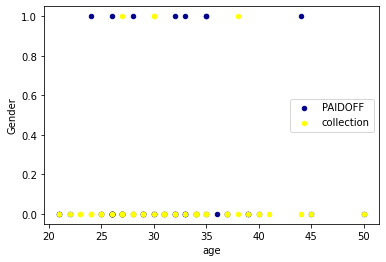

In [46]:
ax = df[df['loan_status'] == 1][0:50].plot(kind='scatter', x='age', y='Gender', color='DarkBlue', label='PAIDOFF');
df[df['loan_status'] == 0][0:50].plot(kind='scatter', x='age', y='Gender', color='Yellow', label='collection', ax=ax);
plt.show()

In [47]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train) 

SVC()

In [48]:
yhat = clf.predict(X_test)
yhat [0:70]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [49]:
yhatSVM = yhat

In [50]:
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [51]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.18      0.13      0.15        15
           1       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

Confusion matrix, without normalization
[[46  9]
 [13  2]]


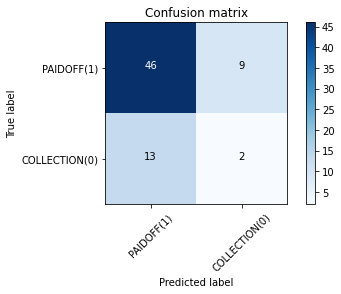

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(0)'],normalize= False,  title='Confusion matrix')

In [54]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6670522459996144

In [55]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.6764705882352942

In [56]:
# Alternative model

clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=1))

Avg F1-score: 0.6914
Jaccard score: 0.7857


# Logistic Regression


In [57]:
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.  , -1.21],
       [ 0.52,  0.92,  0.34,  2.38,  1.84, -1.21],
       [ 0.52, -0.96, -0.65, -0.42,  0.42, -1.21],
       [ 0.52,  0.92, -0.49,  2.38,  0.42,  0.83],
       [ 0.52,  0.92, -0.32, -0.42,  0.42,  0.83]])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [60]:
yhat = LR.predict(X_test)
yhatLR = LR.predict(X_test)
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [61]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob [0:5]

array([[0.5 , 0.5 ],
       [0.45, 0.55],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.32, 0.68]])

In [62]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5777480621814878

# Model Evaluation using Test set


In [63]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [64]:
!wget --no-check-certificate -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-22 20:18:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
  Self-signed certificate encountered.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: 'loan_test.csv'

     0K ...                                                   100% 11.7M=0s

2022-08-22 20:18:53 (11.7 MB/s) - 'loan_test.csv' saved [3642/3642]



### Load Test set for evaluation


In [65]:
test_df = pd.read_csv('loan_test.csv')
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.shape

(54, 11)

In [66]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [67]:
test_df [0:5]

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [68]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [69]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)

In [70]:
test_df['education'].replace(to_replace=['High School or Below','college','Bechalor','Master or Above'], value=[0,1,2,3],inplace=True)

In [71]:
test_df[0:5]

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,1,1000,30,2016-09-08,2016-10-07,50,2,1,3,0
1,5,5,1,300,7,2016-09-09,2016-09-15,35,3,0,4,1
2,21,21,1,1000,30,2016-09-10,2016-10-09,43,0,1,5,1
3,24,24,1,1000,30,2016-09-10,2016-10-09,26,1,0,5,1
4,35,35,1,800,15,2016-09-11,2016-09-25,29,2,0,6,1


In [72]:
Feature1 = test_df[['Principal','terms','age','Gender','education','weekend']]

In [78]:
X_evaltest = Feature1
X_evaltest [0:5]

,Principal,terms,age,Gender,education,weekend
0,1000,30,50,1,2,0
1,300,7,35,0,3,1
2,1000,30,43,1,0,1
3,1000,30,26,0,1,1
4,800,15,29,0,2,1


In [99]:
X_evaltest = preprocessing.StandardScaler().fit(X_evaltest).transform(X_evaltest)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.  , -1.21],
       [ 0.52,  0.92,  0.34,  2.38,  1.84, -1.21],
       [ 0.52, -0.96, -0.65, -0.42,  0.42, -1.21],
       [ 0.52,  0.92, -0.49,  2.38,  0.42,  0.83],
       [ 0.52,  0.92, -0.32, -0.42,  0.42,  0.83]])

In [100]:
y_test1 = test_df['loan_status'].values
y_test1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
yhatKNN1 = neigh.predict(X_evaltest)

In [102]:
yhatKNN1

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [103]:
# KNN
print("Avg F1-score: %.4f" % f1_score(y_test1, yhatKNN1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhatKNN1,pos_label=1))

Avg F1-score: 0.6736
Jaccard score: 0.6863


In [104]:
# Decision Tree

In [105]:
yhatDT = LoanTree.predict(X_evaltest)

print("Avg F1-score: %.4f" % f1_score(y_test1, yhatDT, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhatDT,pos_label=1))


Avg F1-score: 0.7367
Jaccard score: 0.6591


In [118]:
# SVM

In [121]:
yhatSVM1 = clf.predict(X_evaltest)

In [120]:
print("Avg F1-score: %.4f" % f1_score(y_test1, yhatSVM1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhatSVM1,pos_label=1))

Avg F1-score: 0.7584
Jaccard score: 0.7800


In [111]:
# Logistic Regression

In [122]:
yhatLR1 = LR.predict(X_evaltest)

In [113]:
print("Avg F1-score: %.4f" % f1_score(y_test1, yhatLR1, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test1, yhatLR1,pos_label=1))


Avg F1-score: 0.6604
Jaccard score: 0.7358


In [125]:
yhatLR1 = LR.predict(X_evaltest)

In [126]:
yhat_prob1 = LR.predict_proba(X_evaltest)

In [127]:
# from sklearn.metrics import log_loss
log_loss(y_test1, yhat_prob1)

0.5673034458131068

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | .6863   |.6736     | NA      |
| Decision Tree      | .6591   |.7367     | NA      |
| SVM                | .7800   |.7584     | NA      |
| LogisticRegression | .7358   |.6604     |.5673034458131068|

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
